![Market Volatility](/pictures/diagram-representing-red-crashing-market-volatility.jpg)

# Understanding Historical Volatility

## Importance of Grasping Historical Volatility

### Why Grasping Historical Volatility is Crucial
If you’re a budding financial engineer, investor, or market enthusiast, understanding historical volatility is crucial. Historical volatility, by referencing past price data, offers insights into the market's perception of risk. Not only does it aid in evaluating the riskiness of an asset, but it also assists in crafting strategies to manage portfolios effectively.

### Relevance in Finance and Investing
1. **Finance and Investing**: Historical volatility reflects the risk tied to an asset. A high volatility implies higher risk, which often translates to higher returns.
2. **Portfolio Management**: Volatility helps in diversification by understanding how volatile an asset is compared to others in the portfolio.
3. **Derivatives Pricing**: It is indispensable in options pricing. Models like Black-Scholes employ historical volatility to estimate an asset's future risk.

### Why We Need This Concept
1. **Risk Assessment**: Enables us to quantify the risk and potential variation in returns for any given asset.
2. **Investment Decisions**: Guides investors on whether the asset's risk matches their risk appetite.
3. **Benchmarking Performance**: Facilitates comparisons with historical norms to identify unusual market behavior.

## Defining of Historical Volatility

### Breaking Down the Key Formula
Historical volatility measures how much the price of a stock varies over a period. The fundamental formula for historical volatility is:

$$
\sigma = \sqrt{\frac{1}{N-1} \sum_{i=1}^{N} (R_i - \bar{R})^2}
$$

Where:
- $\sigma$ is the historical volatility
- $N$ is the number of observations
- $R_i$ represents the logarithmic return of the price at time $i$
- $\bar{R}$ is the average of the logarithmic returns

### Annualizing Weekly Volatility
To annualize the volatility calculated from weekly data, we use:

$$
\sigma_{\text{annual}} = \sigma_{\text{weekly}} \times \sqrt{52}
$$

This conversion is necessary as it scales the weekly volatility to an annual level, making comparisons with annualized returns straightforward.

### How Parameters Affect the Results
1. **Number of Observations ($N$)**: More observations typically lead to a more accurate estimation of volatility.
2. **Logarithmic Returns ($R_i$)**: Captures the continuous compounding of returns, reflecting the actual growth rate better than simple returns.
3. **Average Logarithmic Return ($\bar{R}$)**: Considering mean return centralizes the volatility measure, giving a base to calculate deviations.

## Section 3: Building Charts Using Python
In this section, we'll use `pandas`, `matplotlib`, and `yfinance` to fetch historical data of SPY and calculate its historical volatility.

### Fetching Historical Data
First, let's fetch the historical weekly closing prices for SPY using the `yfinance` library.

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Fetching SPY historical data
spy = yf.Ticker("SPY")
hist = spy.history(period="5y", interval="1wk")
prices = hist["Close"]

### Calculating Weekly Log Returns
We'll compute the weekly log returns from the closing prices.

In [2]:
# Calculating weekly log returns
log_returns = np.log(prices / prices.shift(1)).dropna()
log_returns_head = log_returns.head()
log_returns_head

Date
2019-08-05 00:00:00-04:00   -0.003424
2019-08-12 00:00:00-04:00   -0.009544
2019-08-19 00:00:00-04:00   -0.013945
2019-08-26 00:00:00-04:00    0.026331
2019-09-02 00:00:00-04:00    0.018967
Name: Close, dtype: float64

### Plotting the Historical Price Evolution
We'll now create a line chart displaying the historical price evolution of SPY over the past 5 years.

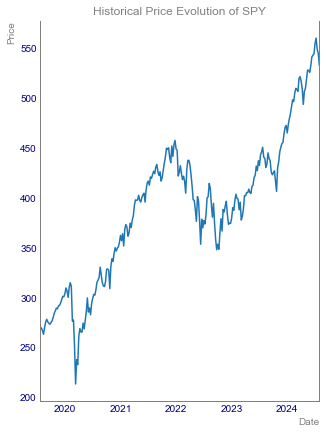

In [3]:
plt.style.use('ddm-chart.mplstyle')

# Plotting historical price evolution
plt.figure()
prices.plot()
plt.title('Historical Price Evolution of SPY')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

### Histogram of Weekly Return Distributions
Next, let's create a histogram of the weekly return distributions for SPY over the past 5 years.

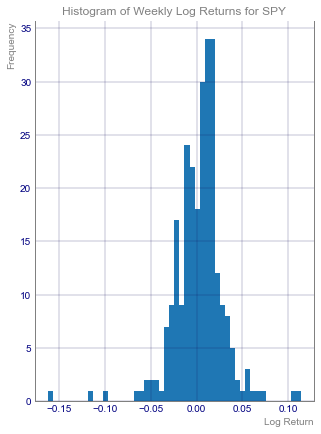

In [4]:
# Plotting histogram of weekly log returns
plt.figure()
log_returns.hist(bins=50)
plt.title('Histogram of Weekly Log Returns for SPY')
plt.xlabel('Log Return')
plt.ylabel('Frequency')
plt.show()

### Rolling Annualized Historical Volatility
We'll now calculate the rolling annualized historical volatility using a 52-week rolling window and plot it.

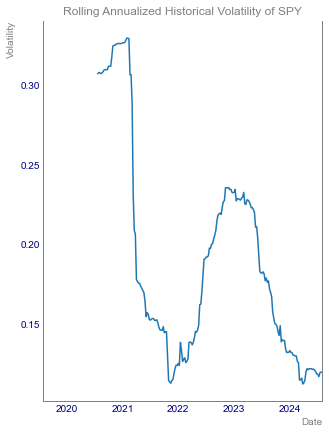

In [5]:
# Calculating rolling annualized volatility
rolling_vol = log_returns.rolling(window=52).std() * np.sqrt(52)

# Plotting rolling annualized volatility
plt.figure()
rolling_vol.plot()
plt.title('Rolling Annualized Historical Volatility of SPY')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.show()

### Comparing 2 assets by their volatility
Let's create a scatter plot comparing the annualized historical volatility as derived from weekly SPY returns against the performance of other ETFs.

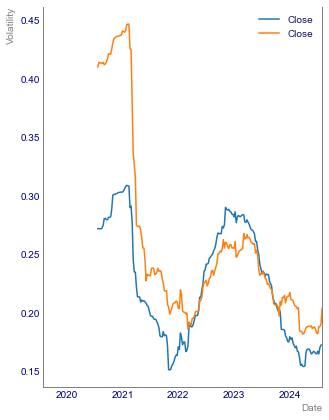

In [6]:
# Fetching historical data for other ETFs
qqq = yf.Ticker("QQQ").history(period="5y", interval="1wk")["Close"]
iwm = yf.Ticker("IWM").history(period="5y", interval="1wk")["Close"]

# Calculating log returns for other ETFs
log_returns_qqq = np.log(qqq / qqq.shift(1)).dropna()
log_returns_iwm = np.log(iwm / iwm.shift(1)).dropna()

# Calculating annualized volatility for other ETFs
vol_qqq = log_returns_qqq.rolling(window=52).std() * np.sqrt(52)
vol_iwm = log_returns_iwm.rolling(window=52).std() * np.sqrt(52)

# Creating the scatter plot
fig, ax = plt.subplots()
vol_qqq.plot(ax=ax)

vol_iwm.plot(ax=ax)
plt.ylabel('Volatility')
plt.legend()
plt.show()

## Conclusion

### Practical Applications
Understanding historical volatility allows you to assess the risk and behaviour of assets over time. It is invaluable in portfolio management and derivative pricing.

### Limitations
- **Past vs. Future**: Historical volatility relies on past data and isn't always indicative of future movements.
- **Distribution Assumptions**: It assumes a normal distribution, which may not always be true in real-world markets.

### Final Thoughts
By integrating historical volatility into your analysis, you can better navigate the financial markets. Don't forget, you can always refer to the corresponding video on the Data Driven Minutes Youtube channel for a more visual walkthrough.